In [4]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

In [ ]:
class MathState(TypedDict):
    value1: int
    value2: int
    result_sum: int
    result_diff: int

    #result: list[int]
    #result: dict{str:int}

In [19]:
def add(state:MathState) -> MathState:
    value1 = state['value1']
    value2 = state['value2']
    state['result_sum'] = value1 + value2
    return state

def sub(state:MathState) -> MathState:
    value1 = state['value1']
    value2 = state['value2']
    state['result_diff'] = value1 - value2
    return state

In [20]:
math_graph = StateGraph(MathState)

math_graph.add_node("Add", add)
math_graph.add_node("Subtract", sub)

math_graph.set_entry_point("Add")
#math_graph.add_edge(START, "Add")
math_graph.add_edge("Add", "Subtract")
math_graph.set_finish_point("Subtract")
#math_graph.add_edge("Subtract", END)

In [21]:
graph = math_graph.compile()

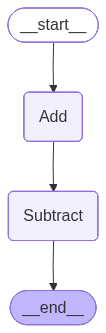

In [22]:
from utils import draw_graph
draw_graph(graph)

In [25]:
result_state = graph.invoke({'value1': 10, 'value2': 3})

In [26]:
result_state

{'value1': 10, 'value2': 3, 'result_sum': 13, 'result_diff': 7}